In [36]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('./data'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

./data/reload.csv
./data/bomb.csv
./data/gesture_data.csv
./data/basket.csv
./data/shield.csv
./data/bowl.csv
./data/volley.csv
./data/logout.csv


In [130]:
import pandas as pd
import ast

# Define the function to convert string representation of list to actual list
def str_to_list(s):
    return [float(x.strip()) for x in s.strip('[]').split(',')]

# Custom converters for array columns
array_converters = {'ax': str_to_list, 'ay': str_to_list, 'az': str_to_list,
                    'gx': str_to_list, 'gy': str_to_list, 'gz': str_to_list}

# Initialize an empty list to store the training data
all_data = []

# Define the gestures and corresponding CSV files
gestures = ['basket', 'bomb', 'bowl', 'logout', 'reload', 'shield', 'volley']
csv_files = [f'./data/{gesture}.csv' for gesture in gestures]

# Define the column names
column_names = ['ax', 'ay', 'az', 'gx', 'gy', 'gz']

# Loop through each gesture and load the corresponding CSV file
for gesture, csv_file in zip(gestures, csv_files):
    # Read the CSV file without headers and assign the column names
    print(f"Loading data for {gesture} gesture from {csv_file}")
    gesture_data = pd.read_csv(csv_file, header=None, names=column_names, converters=array_converters)
    
    # Add a column for the label
    gesture_data['label'] = gesture
    
    # Append to the list of all data
    all_data.append(gesture_data)

# Combine all the data into one DataFrame
training_data = pd.concat(all_data, ignore_index=True)

# Verify the changes
print("Training data 'ax' column first row:")
print(training_data.loc[0, 'ax'])
print("\nType of 'ax' column first row:")
print(type(training_data.loc[0, 'ax']))

# Display the first few rows of the training data to ensure it is loaded correctly
print(training_data.head())

# how many samples do we have for each gesture?
training_data['label'].value_counts()


Loading data for basket gesture from ./data/basket.csv
Loading data for bomb gesture from ./data/bomb.csv
Loading data for bowl gesture from ./data/bowl.csv
Loading data for logout gesture from ./data/logout.csv
Loading data for reload gesture from ./data/reload.csv
Loading data for shield gesture from ./data/shield.csv
Loading data for volley gesture from ./data/volley.csv
Training data 'ax' column first row:
[-13575.0, -19032.0, -25057.0, -32644.0, -32768.0, -25283.0, -16276.0, -13823.0, -9065.0, -7066.0, -5156.0, -6407.0, -5273.0, -4956.0, -2334.0, 839.0, -1428.0, -4297.0, -5948.0, -5083.0, -2184.0, 1381.0, 3765.0, 3611.0, 4424.0, 4688.0, 3421.0, 2862.0, 3709.0, 2742.0, 1866.0, 1276.0, 2653.0, 2914.0, 3459.0, 3760.0, 2902.0, 764.0, -6367.0, -10952.0, -7877.0, -690.0, 755.0, 1798.0, 499.0, -1808.0, -1878.0, -524.0, 5.0, 766.0, 2634.0, 2644.0, 2613.0, 2813.0, 2623.0, 2569.0, 3139.0, 3332.0, 2651.0, 2805.0]

Type of 'ax' column first row:
<class 'list'>
                                

label
volley    101
basket    100
bomb      100
bowl      100
reload    100
shield    100
logout     99
Name: count, dtype: int64

In [131]:
# checking how many data points per axes
mydict = {'ax': [9999,0],
          'ay': [9999,0],
          'az': [9999,0],
          'gx': [9999,0],
          'gy': [9999,0],
          'gz': [9999,0]}
for i in range(len(training_data)):
    for axes, hidden in mydict.items():
        # if less than 60, print which row
        if len(training_data.loc[i, axes]) < 60:
            print(f"Row {i} has less than 60 data points for {axes}")
        
        if len(training_data.loc[i, axes]) < hidden[0]:
            mydict[axes][0] = len(training_data.loc[i, axes])
        if len(training_data.loc[i, axes]) > hidden[1]:
            mydict[axes][1] = len(training_data.loc[i, axes])

print(mydict)

Row 102 has less than 60 data points for ax
Row 102 has less than 60 data points for ay
Row 102 has less than 60 data points for az
Row 102 has less than 60 data points for gx
Row 102 has less than 60 data points for gy
Row 102 has less than 60 data points for gz
Row 149 has less than 60 data points for ax
Row 149 has less than 60 data points for ay
Row 149 has less than 60 data points for az
Row 149 has less than 60 data points for gx
Row 149 has less than 60 data points for gy
Row 149 has less than 60 data points for gz
Row 204 has less than 60 data points for ax
Row 204 has less than 60 data points for ay
Row 204 has less than 60 data points for az
Row 204 has less than 60 data points for gx
Row 204 has less than 60 data points for gy
Row 204 has less than 60 data points for gz
Row 207 has less than 60 data points for ax
Row 207 has less than 60 data points for ay
Row 207 has less than 60 data points for az
Row 207 has less than 60 data points for gx
Row 207 has less than 60 data po

In [132]:
print(training_data.head())

                                                  ax  \
0  [-13575.0, -19032.0, -25057.0, -32644.0, -3276...   
1  [-3556.0, -7322.0, -5290.0, -13322.0, -18508.0...   
2  [-10042.0, -15595.0, -21581.0, -30771.0, -2959...   
3  [-11550.0, -24067.0, -32768.0, -32768.0, -3276...   
4  [-12005.0, -19205.0, -26954.0, -23079.0, -1856...   

                                                  ay  \
0  [-4503.0, -4598.0, -4508.0, -1549.0, 2234.0, -...   
1  [-3728.0, -4350.0, -4038.0, -5261.0, -6325.0, ...   
2  [-718.0, -50.0, 705.0, 8068.0, 7680.0, 3070.0,...   
3  [-4391.0, -9105.0, -7643.0, 899.0, 3065.0, 113...   
4  [-3390.0, -4527.0, -1740.0, -4267.0, -2009.0, ...   

                                                  az  \
0  [-5687.0, -3006.0, -936.0, 9714.0, 32767.0, 32...   
1  [-9356.0, -17185.0, -17604.0, -14342.0, -8898....   
2  [-2264.0, -1022.0, 1488.0, 8192.0, 18408.0, 23...   
3  [-5207.0, -5605.0, -2309.0, 16119.0, 28258.0, ...   
4  [1721.0, 9583.0, 26147.0, 26895.0, 24518.0,

In [133]:
from sklearn.model_selection import train_test_split

# Function to pad or truncate the array
def pad_or_truncate(array, target_length=60):
    if len(array) > target_length:
        return array[:target_length]
    elif len(array) < target_length:
        return array + [0] * (target_length - len(array))
    else:
        return array

# Apply padding or truncating to each column in the training data
for col in ["ax", "ay", "az", "gx", "gy", "gz"]:
    training_data[col] = training_data[col].apply(pad_or_truncate)

# Get the labels
labels = training_data['label']

# Splitting the data into 40% Train, 30% Test, and 30% Hidden
train_data, temp_data = train_test_split(training_data, test_size=0.6, stratify=labels, random_state=42)

temp_labels = temp_data['label']
test_data, hidden_data = train_test_split(temp_data, test_size=0.5, stratify=temp_labels, random_state=42)

# Print how many samples in each set
print("Train data samples:", len(train_data))
print("Test data samples:", len(test_data))
print("Hidden data samples:", len(hidden_data))

# Verify that each set has balanced labels
print("Train label distribution:\n", train_data['label'].value_counts())
print("Test label distribution:\n", test_data['label'].value_counts())
print("Hidden label distribution:\n", hidden_data['label'].value_counts())

Train data samples: 280
Test data samples: 210
Hidden data samples: 210
Train label distribution:
 label
reload    40
bomb      40
shield    40
basket    40
logout    40
bowl      40
volley    40
Name: count, dtype: int64
Test label distribution:
 label
volley    31
bomb      30
bowl      30
shield    30
basket    30
reload    30
logout    29
Name: count, dtype: int64
Hidden label distribution:
 label
logout    30
bomb      30
reload    30
volley    30
bowl      30
shield    30
basket    30
Name: count, dtype: int64


In [134]:
import pandas as pd
import numpy as np
import random
from scipy.interpolate import CubicSpline

# Function for data augmentation using CubicSpline
def time_warping(time_series, num_operations, warp_factor):
    warped_series = time_series.copy()
    
    num_insertions = num_operations // 2
    num_deletions = num_insertions
    
    for _ in range(num_insertions):
        index = random.randint(1, len(warped_series) - 2)
        insertion_value = (warped_series[index - 1] + warped_series[index]) * 0.5
        warp_amount = insertion_value * warp_factor * random.uniform(-1, 1)
        warped_series = np.insert(warped_series, index, insertion_value + warp_amount)
    
    for _ in range(num_deletions):
        if len(warped_series) > 2:
            index = random.randint(1, len(warped_series) - 2)
            warped_series = np.delete(warped_series, index)
    
    return warped_series[:60]  # Ensure the length is 60

def magnitude_warping(time_series, num_knots, warp_std_dev):
    knot_positions = np.linspace(0, len(time_series) - 1, num=num_knots)
    knot_values = 1 + np.random.normal(0, warp_std_dev, num_knots)

    spline = CubicSpline(knot_positions, knot_values)
    time_indexes = np.arange(len(time_series))

    warped_time_series = time_series * spline(time_indexes)
    return warped_time_series[:60]  # Ensure the length is 60

def augment_data(ax, ay, az, gx, gy, gz, num_augmented=1, time_warp_factor=0.05, mag_warp_std_dev=0.05):
    original_length = len(ax)
    
    midpoint_factor = 0.5
    deviation_factor = 0.2
    midpoint = int(original_length * midpoint_factor)
    min_hidden = int(midpoint * (1 - deviation_factor))
    max_hidden = int(midpoint * (1 + deviation_factor))

    num_operations = random.randint(min_hidden, max_hidden)
    mag_warp_knots = random.randint(min_hidden, max_hidden)
    
    augmented_data = []
    for _ in range(num_augmented):
        warped_ax = time_warping(ax, num_operations=num_operations, warp_factor=time_warp_factor)
        warped_ay = time_warping(ay, num_operations=num_operations, warp_factor=time_warp_factor)
        warped_az = time_warping(az, num_operations=num_operations, warp_factor=time_warp_factor)
        warped_gx = time_warping(gx, num_operations=num_operations, warp_factor=time_warp_factor)
        warped_gy = time_warping(gy, num_operations=num_operations, warp_factor=time_warp_factor)
        warped_gz = time_warping(gz, num_operations=num_operations, warp_factor=time_warp_factor)

        warped_ax = magnitude_warping(warped_ax, num_knots=mag_warp_knots, warp_std_dev=mag_warp_std_dev)
        warped_ay = magnitude_warping(warped_ay, num_knots=mag_warp_knots, warp_std_dev=mag_warp_std_dev)
        warped_az = magnitude_warping(warped_az, num_knots=mag_warp_knots, warp_std_dev=mag_warp_std_dev)
        warped_gx = magnitude_warping(warped_gx, num_knots=mag_warp_knots, warp_std_dev=mag_warp_std_dev)
        warped_gy = magnitude_warping(warped_gy, num_knots=mag_warp_knots, warp_std_dev=mag_warp_std_dev)
        warped_gz = magnitude_warping(warped_gz, num_knots=mag_warp_knots, warp_std_dev=mag_warp_std_dev)

        augmented_data.append({
            'ax': warped_ax.tolist(),
            'ay': warped_ay.tolist(),
            'az': warped_az.tolist(),
            'gx': warped_gx.tolist(),
            'gy': warped_gy.tolist(),
            'gz': warped_gz.tolist()
        })
    
    return augmented_data

# Example of loading and augmenting the data
augmented_data = []
for _, row in train_data.iterrows():
    augmented = augment_data(
        np.array(row['ax']), np.array(row['ay']), np.array(row['az']),
        np.array(row['gx']), np.array(row['gy']), np.array(row['gz']),
        num_augmented=4
    )
    for aug in augmented:
        new_row = row.copy()
        new_row['ax'] = aug['ax']
        new_row['ay'] = aug['ay']
        new_row['az'] = aug['az']
        new_row['gx'] = aug['gx']
        new_row['gy'] = aug['gy']
        new_row['gz'] = aug['gz']
        augmented_data.append(new_row)

# Combine original and augmented data
augmented_train_data = pd.concat([train_data, pd.DataFrame(augmented_data)], ignore_index=True)

# Verify the new data structure
print(augmented_train_data.head())

# print how many samples in each set
print("Original data samples:", len(train_data))
print("Augmented data samples:", len(augmented_train_data))


                                                  ax  \
0  [974.0, 1089.0, 1866.0, 340.0, -2225.0, -2461....   
1  [-4194.0, -8161.0, -6738.0, -9183.0, -12052.0,...   
2  [-8855.0, -11037.0, -15221.0, -24001.0, -32768...   
3  [-12005.0, -19205.0, -26954.0, -23079.0, -1856...   
4  [-15922.0, -25803.0, -32768.0, -32768.0, -3276...   

                                                  ay  \
0  [-6819.0, -8157.0, -8580.0, -6844.0, -2581.0, ...   
1  [12600.0, 7407.0, 1918.0, -3776.0, -10334.0, -...   
2  [10562.0, 14609.0, 9356.0, 7712.0, 8560.0, 653...   
3  [-3390.0, -4527.0, -1740.0, -4267.0, -2009.0, ...   
4  [-12301.0, -8009.0, -6195.0, 7082.0, 31512.0, ...   

                                                  az  \
0  [19926.0, 22743.0, 22977.0, 20723.0, 16392.0, ...   
1  [-11058.0, -16144.0, -18150.0, -18900.0, -2224...   
2  [-13744.0, -17199.0, -22902.0, -25573.0, -2496...   
3  [1721.0, 9583.0, 26147.0, 26895.0, 24518.0, 21...   
4  [-11325.0, -10931.0, -8384.0, -4834.0, -381

In [135]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Fit the MinMaxScaler to 16-bit signed integer range
scaler = MinMaxScaler(feature_range=(-1, 1))  # Scale data between -1 and 1
scaler.fit(np.array([-2**15, 2**15 - 1]).reshape(-1, 1))

# Function to scale individual arrays using the fitted MinMaxScaler
def scale_array(arr):
    arr = np.array(arr).reshape(-1, 1)  # Reshape for scaler
    return scaler.transform(arr).flatten().tolist()  # Flatten back to 1D list

# Apply the scaling function to each column (ax, ay, az, gx, gy, gz) in the training, test, and hidden datasets
for col in ["ax", "ay", "az", "gx", "gy", "gz"]:
    # Scale augmented training data
    augmented_train_data[col] = augmented_train_data[col].apply(scale_array)
    
    # Scale test data
    test_data[col] = test_data[col].apply(scale_array)
    
    # Scale hidden data
    hidden_data[col] = hidden_data[col].apply(scale_array)

# Now `augmented_train_data`, `test_data`, and `hidden_data` are scaled consistently using the MinMaxScaler

# print a few samples of scaled data
print("Scaled augmented training data samples:")
print(augmented_train_data.head())
print("\nScaled test data samples:")
print(test_data.head())
print("\nScaled hidden data samples:")
print(hidden_data.head())

Scaled augmented training data samples:
                                                  ax  \
0  [0.029739833676661324, 0.0332494087129015, 0.0...   
1  [-0.12797741664759288, -0.2490424963759823, -0...   
2  [-0.2702220187685969, -0.33681239032578014, -0...   
3  [-0.36635385671778437, -0.5860837720302129, -0...   
4  [-0.48589303425650415, -0.7874418249790188, -1...   

                                                  ay  \
0  [-0.2080872816052491, -0.24892042420080873, -0...   
1  [0.38454261081864655, 0.2260624093995575, 0.05...   
2  [0.32234683756771193, 0.4458533607995728, 0.28...   
3  [-0.10344090943770504, -0.13813992523079272, -...   
4  [-0.37538719768062867, -0.24440375371938658, -...   

                                                  az  \
0  [0.6081177996490424, 0.6940871290150301, 0.701...   
1  [-0.3374532692454414, -0.4926680399786374, -0....   
2  [-0.41942473487449455, -0.5248645761806668, -0...   
3  [0.05253681239032578, 0.29246967269398033, 0.7...   
4  [-0

In [136]:
# Check for min and max lengths in the data
min_max_lengths = {'ax': [9999, 0], 'ay': [9999, 0], 'az': [9999, 0], 'gx': [9999, 0], 'gy': [9999, 0], 'gz': [9999, 0]}
for i in range(len(augmented_train_data)):
    for axes, hidden in min_max_lengths.items():
        if len(augmented_train_data.loc[i, axes]) < hidden[0]:
            min_max_lengths[axes][0] = len(augmented_train_data.loc[i, axes])
        if len(augmented_train_data.loc[i, axes]) > hidden[1]:
            min_max_lengths[axes][1] = len(augmented_train_data.loc[i, axes])

print(min_max_lengths)

# Find final min and max hiddenues
min_hiddenues = {}
max_hiddenues = {}

for column in ["ax","ay","az","gx","gy","gz"]:
    min_hiddenues[column] = np.min([np.min(row) for row in augmented_train_data[column] if isinstance(row, list)])
    max_hiddenues[column] = np.max([np.max(row) for row in augmented_train_data[column] if isinstance(row, list)])

for column in ["ax","ay","az","gx","gy","gz"]:
    print(f"{column} - Min: {min_hiddenues[column]}, Max: {max_hiddenues[column]}")
    
# verify the changes by getting the shape of the data
print(augmented_train_data.shape)
print(test_data.shape)
print(hidden_data.shape)


{'ax': [60, 60], 'ay': [60, 60], 'az': [60, 60], 'gx': [60, 60], 'gy': [60, 60], 'gz': [60, 60]}
ax - Min: -1.218018969767975, Max: 0.6466592764746347
ay - Min: -1.0640102794753585, Max: 1.106744235905201
az - Min: -1.1171231051007322, Max: 1.1193285753388598
gx - Min: -1.1721567273479496, Max: 1.1235317295512266
gy - Min: -1.171083568913699, Max: 1.1959202729584122
gz - Min: -1.1610976859701116, Max: 1.1641309394779453
(1400, 7)
(210, 7)
(210, 7)


In [137]:
# print head for augmented data
# print(augmented_train_data.head())
# print(test_data.head())
# print(hidden_data.head())

# print proportion of each gesture in the augmented data
print(augmented_train_data['label'].value_counts(normalize=True))

label
reload    0.142857
bomb      0.142857
shield    0.142857
basket    0.142857
logout    0.142857
bowl      0.142857
volley    0.142857
Name: proportion, dtype: float64


In [138]:
import numpy as np

# Convert NumPy arrays to lists of floats for all the relevant columns
augmented_train_data['ax'] = augmented_train_data['ax'].apply(lambda x: list(map(float, x)))
augmented_train_data['ay'] = augmented_train_data['ay'].apply(lambda y: list(map(float, y)))
augmented_train_data['az'] = augmented_train_data['az'].apply(lambda z: list(map(float, z)))
augmented_train_data['gx'] = augmented_train_data['gx'].apply(lambda x: list(map(float, x)))
augmented_train_data['gy'] = augmented_train_data['gy'].apply(lambda y: list(map(float, y)))
augmented_train_data['gz'] = augmented_train_data['gz'].apply(lambda z: list(map(float, z)))

test_data['ax'] = test_data['ax'].apply(lambda x: list(map(float, x)))
test_data['ay'] = test_data['ay'].apply(lambda y: list(map(float, y)))
test_data['az'] = test_data['az'].apply(lambda z: list(map(float, z)))
test_data['gx'] = test_data['gx'].apply(lambda x: list(map(float, x)))
test_data['gy'] = test_data['gy'].apply(lambda y: list(map(float, y)))
test_data['gz'] = test_data['gz'].apply(lambda z: list(map(float, z)))

hidden_data['ax'] = hidden_data['ax'].apply(lambda x: list(map(float, x)))
hidden_data['ay'] = hidden_data['ay'].apply(lambda y: list(map(float, y)))
hidden_data['az'] = hidden_data['az'].apply(lambda z: list(map(float, z)))
hidden_data['gx'] = hidden_data['gx'].apply(lambda x: list(map(float, x)))
hidden_data['gy'] = hidden_data['gy'].apply(lambda y: list(map(float, y)))
hidden_data['gz'] = hidden_data['gz'].apply(lambda z: list(map(float, z)))

augmented_train_data.to_csv("./processed/processed_train_gesture_data.csv", index=False)
test_data.to_csv("./processed/processed_test_gesture_data.csv", index=False)
hidden_data.to_csv("./processed/processed_hidden_gesture_data.csv", index=False)


In [142]:
# load in for single training

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import setuptools.dist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.regularizers import l2
from tensorflow.keras.models import Model
from tensorflow.keras.layers import InputLayer, Conv1D, BatchNormalization, MaxPooling1D, Flatten, Dense, Dropout
from tensorflow.keras.models import Sequential
import pickle


# Load the processed train and test data
train_data = pd.read_csv("./processed/processed_train_gesture_data.csv")
test_data = pd.read_csv("./processed/processed_test_gesture_data.csv")
hidden_data = pd.read_csv("./processed/processed_hidden_gesture_data.csv")

def str_to_list(s):
    return [float(x.strip()) for x in s.strip('[]').split(',')]

# Concatenating 6 columns: ax, ay, az, gx, gy, gz
X_train = np.array([str_to_list(row['ax']) + str_to_list(row['ay']) + str_to_list(row['az']) +
                    str_to_list(row['gx']) + str_to_list(row['gy']) + str_to_list(row['gz'])
                    for _, row in train_data.iterrows()], dtype=np.float32)

X_test = np.array([str_to_list(row['ax']) + str_to_list(row['ay']) + str_to_list(row['az']) +
                   str_to_list(row['gx']) + str_to_list(row['gy']) + str_to_list(row['gz'])
                   for _, row in test_data.iterrows()], dtype=np.float32)

X_hidden = np.array([str_to_list(row['ax']) + str_to_list(row['ay']) + str_to_list(row['az']) +
                     str_to_list(row['gx']) + str_to_list(row['gy']) + str_to_list(row['gz'])
                     for _, row in hidden_data.iterrows()], dtype=np.float32)



# Prepare the labels for training
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(train_data['label'])
y_test = label_encoder.transform(test_data['label'])
y_hidden = label_encoder.transform(hidden_data['label'])

# Save the LabelEncoder to a file for later use
with open('./model_dir/label_encoder.pkl', 'wb') as file:
    pickle.dump(label_encoder, file)

# Convert labels to one-hot encoding
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
y_hidden = to_categorical(y_hidden)

# Reshape input data to match the input shape expected by the 1D CNN
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)
X_hidden = X_hidden.reshape(X_hidden.shape[0], X_hidden.shape[1], 1)

# Automate input shape
sequence_length = X_train.shape[1]

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)



model = Sequential(
    [   
        InputLayer(input_shape=(sequence_length, 1)),
        
        # Conv1D layer
        Conv1D(filters=8, kernel_size=3, activation='relu'),
        # BatchNormalization(),
        MaxPooling1D(pool_size=2),
        
        # Flatten and Dense layers
        Flatten(),
        Dense(16, activation='relu', kernel_regularizer=l2(0.01)),
        BatchNormalization(),
        Dropout(0.5),
        
        # Output layer
        Dense(y_train.shape[1], activation='softmax')
    ]
)

# model = Sequential(
#     [   
     
#         InputLayer(input_shape=(sequence_length, 1)),
        
#         # First Conv1D layer
#         Conv1D(filters=16, kernel_size=3, activation='relu'),
#         MaxPooling1D(pool_size=2),
        
#         # Flatten and Dense layers
#         Flatten(),
#         Dense(16, activation='relu', kernel_regularizer=l2(0.01)),
#         Dropout(0.2),
#         # Output layer
#         Dense(y_train.shape[1], activation='softmax')
#     ]
# )

# Summary
model.summary()


X_train shape: (1400, 360, 1)
X_test shape: (210, 360, 1)
y_train shape: (1400, 7)
y_test shape: (210, 7)


/home/prince/Documents/capstone/Gesture-AI/.venv/lib/python3.12/site-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_8 (Conv1D)               │ (None, 358, 8)         │            32 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_4 (MaxPooling1D)  │ (None, 179, 8)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_6 (Flatten)             │ (None, 1432)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 16)             │        22,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 16)             │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 7)              │           119 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 23,143 (90.40 KB)

 Trainable params: 23,111 (90.28 KB)

 Non-trainable params: 32 (128.00 B)

In [143]:
# load in for single training


# Compile the model
from tensorflow.keras.optimizers import Adam

# Create the Adam optimizer with a custom learning rate
adam_optimizer = Adam(learning_rate=0.001)  

model.compile(optimizer=adam_optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

from tensorflow.keras.callbacks import EarlyStopping

# Early Stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True, mode='min')

print("Training model...")

# Train the model with early stopping
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), 
                    epochs=50, batch_size=32, verbose=1, callbacks=[early_stopping])


Training model...
Epoch 1/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - accuracy: 0.4569 - loss: 1.7989 - val_accuracy: 0.8857 - val_loss: 1.6900
Epoch 2/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.8383 - loss: 0.8753 - val_accuracy: 0.9714 - val_loss: 1.3011
Epoch 3/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.9305 - loss: 0.6058 - val_accuracy: 0.9810 - val_loss: 0.9629
Epoch 4/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.9667 - loss: 0.4790 - val_accuracy: 0.9857 - val_loss: 0.6924
Epoch 5/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.9642 - loss: 0.4117 - val_accuracy: 0.9857 - val_loss: 0.5110
Epoch 6/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.9622 - loss: 0.3786 - val_accuracy: 0.9905 - val_loss: 0.3668
Epoch 7/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.9804 - loss: 0.3155 - val_accuracy: 0.9952 - val_loss: 0.2571
Epoch 8/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.9696 - loss: 0.2770 - val_ac

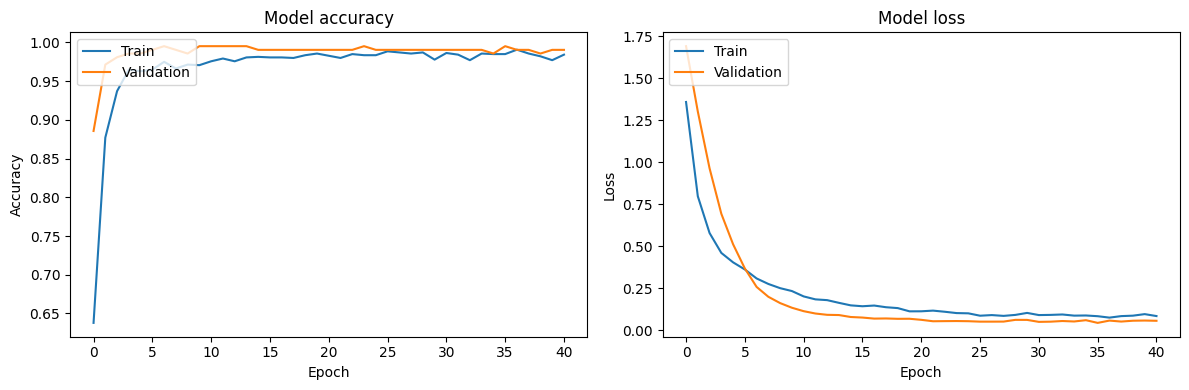

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


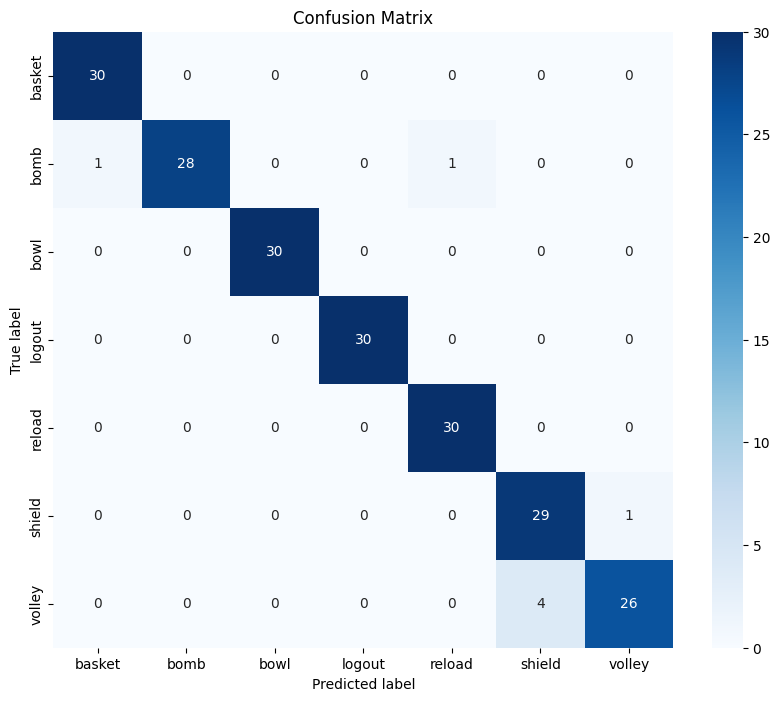

Hidden accuracy: 0.9667


In [144]:
# load in for single training
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Assuming label_encoder is already loaded and trained
# Use the label_encoder to convert numeric labels back to their original string labels

# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))
plt.subplot(121)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(122)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.tight_layout()
plt.show()

# Confusion Matrix
y_pred = model.predict(X_hidden)
y_pred_classes = np.argmax(y_pred, axis=1)  # Predicted class indices
y_true = np.argmax(y_hidden, axis=1)        # True class indices

# Get the string labels from label_encoder
class_labels = label_encoder.inverse_transform(np.arange(len(label_encoder.classes_)))

# Create the confusion matrix
cm = confusion_matrix(y_true, y_pred_classes)

# Plot confusion matrix with labels
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

# Hidden accuracy calculation
hidden_accuracy = np.sum(np.diag(cm)) / np.sum(cm)
print(f"Hidden accuracy: {hidden_accuracy:.4f}")


In [123]:
import os
import shutil
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.regularizers import l2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, BatchNormalization, MaxPooling1D, Flatten, Dense, Dropout, InputLayer
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, Callback
import keras_tuner as kt

# Custom callback to monitor the total number of parameters
class ModelParamsCallback(Callback):
    def __init__(self, size_limit_kb=150):
        super(ModelParamsCallback, self).__init__()
        self.size_limit_kb = size_limit_kb

    def on_epoch_begin(self, epoch, logs=None):
        total_params = self.model.count_params()
        param_size_kb = (total_params * 4) / 1024  # Assuming each parameter is a float32, which is 4 bytes
        print(f"Epoch {epoch + 1}: Model size (based on parameters) = {param_size_kb:.2f} KB")
        if param_size_kb > self.size_limit_kb:
            print(f"Model size exceeded {self.size_limit_kb} KB based on parameters. Stopping training.")
            self.model.stop_training = True

# Remove the existing tuner directory to start a new search
shutil.rmtree('my_dir/gesture_cnn_tuning', ignore_errors=True)

# Load the processed train and test data
train_data = pd.read_csv("./processed/processed_train_gesture_data.csv")
test_data = pd.read_csv("./processed/processed_test_gesture_data.csv")
hidden_data = pd.read_csv("./processed/processed_hidden_gesture_data.csv")

def str_to_list(s):
    return [float(x.strip()) for x in s.strip('[]').split(',')]

# Concatenating 6 columns: ax, ay, az, gx, gy, gz
X_train = np.array([str_to_list(row['ax']) + str_to_list(row['ay']) + str_to_list(row['az']) +
                    str_to_list(row['gx']) + str_to_list(row['gy']) + str_to_list(row['gz'])
                    for _, row in train_data.iterrows()], dtype=np.float32)

X_test = np.array([str_to_list(row['ax']) + str_to_list(row['ay']) + str_to_list(row['az']) +
                   str_to_list(row['gx']) + str_to_list(row['gy']) + str_to_list(row['gz'])
                   for _, row in test_data.iterrows()], dtype=np.float32)

X_hidden = np.array([str_to_list(row['ax']) + str_to_list(row['ay']) + str_to_list(row['az']) +
                     str_to_list(row['gx']) + str_to_list(row['gy']) + str_to_list(row['gz'])
                     for _, row in hidden_data.iterrows()], dtype=np.float32)


# Prepare the labels for training
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(train_data['label'])
y_test = label_encoder.transform(test_data['label'])
y_hidden = label_encoder.transform(hidden_data['label'])

# Convert labels to one-hot encoding
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
y_hidden = to_categorical(y_hidden)

# Reshape input data to match the input shape expected by the 1D CNN
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)
X_hidden = X_hidden.reshape(X_hidden.shape[0], X_hidden.shape[1], 1)

# Automate input shape
sequence_length = X_train.shape[1]

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

# Define the model-building function for hyperparameter tuning
def build_model(hp):
    model = Sequential()

    # Input Layer
    model.add(InputLayer(input_shape=(sequence_length, 1)))

    # Conv1D layers
    for i in range(hp.Int('num_conv_layers', 1, 3)):
        model.add(Conv1D(
            filters=hp.Int(f'conv_{i}_filters', 4, 16, step=4),
            kernel_size=hp.Choice(f'conv_{i}_kernel_size', [3, 5]),
            activation='relu'
        ))
        if hp.Boolean(f'batch_norm_{i}'):
            model.add(BatchNormalization())
        if hp.Boolean(f'max_pooling_{i}'):
            model.add(MaxPooling1D(pool_size=hp.Int(f'pool_size_{i}', 2, 4)))

    model.add(Flatten())

    # Dense layers
    for i in range(hp.Int('num_dense_layers', 1, 3)):
        model.add(Dense(
            units=hp.Int(f'dense_{i}_units', 4, 16, step=4),
            activation='relu',
            kernel_regularizer=l2(hp.Float(f'l2_{i}', 0.001, 0.01, step=0.001))
        ))
        if hp.Boolean(f'dropout_{i}'):
            model.add(Dropout(hp.Float(f'dropout_rate_{i}', 0.2, 0.5, step=0.1)))
        if hp.Boolean(f'batch_norm_dense_{i}'):
            model.add(BatchNormalization())

    # Output layer
    model.add(Dense(y_train.shape[1], activation='softmax'))

    # Compile the model
    model.compile(
        optimizer=Adam(hp.Float('learning_rate', 1e-4, 1e-2, sampling='log')),
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )

    return model

# Hyperparameter tuning
tuner = kt.Hyperband(
    build_model,
    objective='val_accuracy',
    max_epochs=50,
    hyperband_iterations=2,
    directory='my_dir',
    project_name='gesture_cnn_tuning'
)

# Early Stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True, mode='min')

# Model Params callback
model_params_callback = ModelParamsCallback(size_limit_kb=150)

print("Searching for the best hyperparameters...")

# Search for the best hyperparameters, including batch size
tuner.search(X_train, y_train, validation_data=(X_test, y_test), 
             epochs=50, 
             batch_size=32,  # Fixed batch size during the search
             callbacks=[early_stopping, model_params_callback])

# Get the optimal hyperparameters
best_hp = tuner.get_best_hyperparameters(num_trials=1)[0]

print("Building the best model with optimal hyperparameters...")
# Build the model with the optimal hyperparameters and train it
model = tuner.hypermodel.build(best_hp)

best_epochs = best_hp.get('max_epochs') if 'max_epochs' in best_hp.values else 50
best_batch_size = best_hp.get('batch_size') if 'batch_size' in best_hp.values else 32

history = model.fit(X_train, y_train, validation_data=(X_test, y_test), 
                    epochs=best_epochs,  # Set the number of epochs
                    batch_size=best_batch_size,  # Set the batch size
                    callbacks=[early_stopping, model_params_callback])


Trial 180 Complete [00h 00m 44s]
val_accuracy: 0.5714285969734192

Best val_accuracy So Far: 1.0
Total elapsed time: 01h 00m 05s
Building the best model with optimal hyperparameters...
Epoch 1: Model size (based on parameters) = 89.87 KB
Epoch 1/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 3s 63ms/step - accuracy: 0.4699 - loss: 1.7704 - val_accuracy: 0.7381 - val_loss: 1.7969
Epoch 2: Model size (based on parameters) = 89.87 KB
Epoch 2/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.9559 - loss: 0.7728 - val_accuracy: 0.8619 - val_loss: 1.5975
Epoch 3: Model size (based on parameters) = 89.87 KB
Epoch 3/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.9873 - loss: 0.6112 - val_accuracy: 0.8905 - val_loss: 1.4379
Epoch 4: Model size (based on parameters) = 89.87 KB
Epoch 4/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.9982 - loss: 0.4911 - val_accuracy: 0.9095 - val_loss: 1.3097
Epoch 5: Model size (based on parameters) = 89.87 KB
Epoch 5/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step -

In [124]:

for idx, layer in enumerate(model.layers):
    layer_name = layer.name
    input_shape = str(layer.input.shape)
    output_shape = str(layer.output.shape)
    weights = layer.get_weights()  # This returns a list of numpy arrays
    weights_shapes = [str(w.shape) for w in weights] if weights else "None"
    weights_shapes_str = ", ".join(weights_shapes) if isinstance(weights_shapes, list) else weights_shapes
    comments = "No weights" if not weights else f"Layer with {len(weights)} weight(s)"
    
    # Example to add specific comments based on layer type
    if 'conv' in layer_name.lower():
        comments = f"{weights_shapes[0][-1]} filters, {weights_shapes[0][0:2]} kernel size"
    elif 'dense' in layer_name.lower():
        comments = "Fully connected layer"
    elif 'flatten' in layer_name.lower():
        comments = "Flattens the input"
    elif 'pool' in layer_name.lower():
        comments = "Pooling layer"
    
    print(f"| {idx:<11} | {layer_name:<12} | {input_shape:<20} | {output_shape:<20} | {weights_shapes_str:<30} | {comments:<24} |")


| 0           | conv1d_3     | (None, 360, 1)       | (None, 356, 4)       | (5, 1, 4), (4,)                | ) filters, (5 kernel size |
| 1           | flatten_1    | (None, 356, 4)       | (None, 1424)         | None                           | Flattens the input       |
| 2           | dense_3      | (None, 1424)         | (None, 16)           | (1424, 16), (16,)              | Fully connected layer    |
| 3           | batch_normalization_2 | (None, 16)           | (None, 16)           | (16,), (16,), (16,), (16,)     | Layer with 4 weight(s)   |
| 4           | dense_4      | (None, 16)           | (None, 7)            | (16, 7), (7,)                  | Fully connected layer    |


In [125]:
    

# # save the one-hot encoding labels as json
# label_encoder_path = './model_dir/lab_encoder.json'
# label_encoder = label_encoder.classes_

# save the model
model_path = './model_dir/gesture_model_real.h5'
model.save(model_path)

In [126]:
# load the model

from tensorflow.keras.models import load_model

model_path = './model_dir/gesture_model_real.h5'

model = load_model(model_path)

# Evaluate the loaded model

model.summary()



Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_3 (Conv1D)               │ (None, 356, 4)         │            24 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 1424)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 16)             │        22,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 16)             │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 7)              │           119 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 23,009 (89.88 KB)

 Trainable params: 22,975 (89.75 KB)

 Non-trainable params: 32 (128.00 B)

 Optimizer params: 2 (12.00 B)

In [3]:
# THIS FUNCTION IS USED TO GENERATE HLS CODE FOR A GIVEN KERAS MODEL WITH AXIS DATA STREAMING

import numpy as np

def generate_hls_code(model):
    # Create the header file content
    header_file_content = [
"""
#include <iostream>
#include <hls_stream.h>
#include "hls_math.h"
#include "ap_fixed.h"
#include "ap_axi_sdata.h"
// typedef ap_fixed<32, 16> fixed_p;
typedef float fixed_p;
typedef hls::axis<float, 2, 5, 6> data_t;
typedef hls::stream<data_t> mystream;

void gesture_model(mystream &input_stream, mystream &output_stream);
"""
    ]
    
    weight_file_content = ['#include "core.h"']
    
    # Generate the HLS function definitions
    hls_functions = []
    gesture_model_body = []
    output_var_declarations = []
    
    # Track the index for naming variables
    from collections import defaultdict
    layer_vars = defaultdict(int)
    
    prev_output_var = "input"
    overall_input_size = model.layers[0].input.shape[1]  # Assume first layer's input shape for the gesture model
    
    for idx, layer in enumerate(model.layers):
        layer_type = layer.name.split('_')[0].lower()
        input_shape = layer.input.shape
        output_shape = layer.output.shape
        weights = layer.get_weights()

        print(f"Layer {idx}: {layer_type}")
        
        layer_idx = layer_vars[layer_type]
        layer_vars[layer_type] = layer_idx + 1
        
        if 'conv' in layer_type:
            kernel_size = weights[0].shape[0]
            num_filters = weights[0].shape[-1]
            input_size = input_shape[1]
            output_size = output_shape[1]
            channel_size = input_shape[2]

            # Generate Conv1D HLS code
            hls_functions.append(f"""
        void conv1d_{layer_idx}(fixed_p input[{input_size}][{channel_size}], fixed_p output[{output_size}][{num_filters}])
        {{
            for (int i = 0; i < {output_size}; i++) // Loop over output positions
            {{
                for (int j = 0; j < {num_filters}; j++) // Loop over filters
                {{
                    fixed_p sum = 0;
                    for (int k = 0; k < {kernel_size}; k++) // Loop over the kernel size
                    {{
                        #pragma HLS unroll factor=2
                        for (int c = 0; c < {channel_size}; c++) // Loop over input channels
                        {{
                            #pragma HLS unroll factor=2
                            sum += input[i + k][c] * conv1d_{layer_idx}_weights[k][c][j];
                        }}
                    }}
                    output[i][j] = relu(sum + conv1d_{layer_idx}_biases[j]);
                }}
            }}
        }}
        """)
            # Add weight definitions to the header
            weight_file_content.append(f"// Conv1D Layer {layer_idx} Weights")
            weight_file_content.append(f"const fixed_p conv1d_{layer_idx}_weights[{kernel_size}][{channel_size}][{num_filters}] = {{")
            for kernel in weights[0]:
                weight_file_content.append(f"    {{{', '.join(map(str, kernel.flatten()))}}},")
            weight_file_content.append("};")

            weight_file_content.append(f"const fixed_p conv1d_{layer_idx}_biases[{num_filters}] = {{")
            weight_file_content.append(f"    {', '.join(map(str, weights[1]))}")
            weight_file_content.append("};\n")

            output_var = f"conv1d_out_{layer_idx}"
            output_var_declarations.append(f"    fixed_p {output_var}[{output_size}][{num_filters}];")
            gesture_model_body.append(f"    conv1d_{layer_idx}({prev_output_var}, {output_var});")
            prev_output_var = output_var

        elif 'flatten' in layer_type:
            input_dim1 = input_shape[1]
            input_dim2 = input_shape[2]
            output_size = output_shape[1]

            # Generate Flatten HLS code
            hls_functions.append(f"""
void flatten_{layer_idx}(fixed_p input[{input_dim1}][{input_dim2}], fixed_p output[{output_size}])
{{
    #pragma HLS INLINE
    int idx = 0;
    for (int i = 0; i < {input_dim1}; i++)
    {{
        for (int j = 0; j < {input_dim2}; j++)
        {{
            output[idx++] = input[i][j];
        }}
    }}
}}
""")
            output_var = f"flatten_out_{layer_idx}"
            output_var_declarations.append(f"    fixed_p {output_var}[{output_size}];")
            gesture_model_body.append(f"    flatten_{layer_idx}({prev_output_var}, {output_var});")
            prev_output_var = output_var

        elif 'dense' in layer_type:
            input_size = input_shape[1]
            output_size = output_shape[1]
            
            activation = layer.activation.__name__.lower()

            if activation == 'softmax':
                # Generate Dense + Softmax HLS code
                hls_functions.append(f"""
        void dense_{layer_idx}(fixed_p input[{input_size}], fixed_p output[{output_size}])
        {{
            for (int i = 0; i < {output_size}; i++)
            {{
                fixed_p sum = 0;
                for (int j = 0; j < {input_size}; j++)
                {{
                    #pragma HLS unroll factor=2
                    sum += input[j] * dense_{layer_idx}_weights[j][i];
                }}
                output[i] = sum + dense_{layer_idx}_biases[i]; // No ReLU before softmax
            }}

            fixed_p softmax_sum = 0;
            for (int i = 0; i < {output_size}; i++)
            {{
                #pragma HLS unroll factor=2
                fixed_p softmax_out = output[i];
                softmax_sum += hls::exp(softmax_out);
            }}
            for (int i = 0; i < {output_size}; i++)
            {{
                #pragma HLS unroll factor=2
                output[i] = hls::exp(output[i]) / softmax_sum;
            }}
        }}
        """)
            else:
                # Generate Dense HLS code with ReLU
                hls_functions.append(f"""
        void dense_{layer_idx}(fixed_p input[{input_size}], fixed_p output[{output_size}])
        {{
            for (int i = 0; i < {output_size}; i++)
            {{
                fixed_p sum = 0;
                for (int j = 0; j < {input_size}; j++)
                {{
                    #pragma HLS unroll factor=2
                    sum += input[j] * dense_{layer_idx}_weights[j][i];
                }}
                output[i] = relu(sum + dense_{layer_idx}_biases[i]); // Apply ReLU
            }}
        }}
        """)

            # Add weight definitions to the header
            weight_file_content.append(f"// Dense Layer {layer_idx} Weights")
            weight_file_content.append(f"const fixed_p dense_{layer_idx}_weights[{input_size}][{output_size}] = {{")
            for w in weights[0]:
                weight_file_content.append(f"    {{{', '.join(map(str, w.flatten()))}}},")
            weight_file_content.append("};")

            weight_file_content.append(f"const fixed_p dense_{layer_idx}_biases[{output_size}] = {{")
            weight_file_content.append(f"    {', '.join(map(str, weights[1]))}")
            weight_file_content.append("};\n")

            output_var = f"dense_out_{layer_idx}"
            output_var_declarations.append(f"    fixed_p {output_var}[{output_size}];")
            gesture_model_body.append(f"    dense_{layer_idx}({prev_output_var}, {output_var});")
            prev_output_var = output_var
        elif 'batch' in layer_type:
            num_channels = input_shape[-1]  # Number of channels in the input/output

            # Check the shape of the previous output to determine the correct implementation
            if "conv1d_out" in prev_output_var:
                # Previous layer is a Conv1D layer
                hls_functions.append(f"""
        void batch_normalization_{layer_idx}(fixed_p input[{input_shape[1]}][{num_channels}], fixed_p output[{input_shape[1]}][{num_channels}])
        {{
            for (int i = 0; i < {input_shape[1]}; i++) // Loop over time steps
            {{
                for (int j = 0; j < {num_channels}; j++) // Loop over channels
                {{
                    #pragma HLS unroll factor=2
                    fixed_p batch_norm_eps = batch_norm_{layer_idx}_variance[j] + epsilon;
                    output[i][j] = batch_norm_{layer_idx}_gamma[j] * ((input[i][j] - batch_norm_{layer_idx}_mean[j]) / hls::sqrt(batch_norm_eps)) + batch_norm_{layer_idx}_beta[j];
                }}
            }}
        }}
        """)
            elif "dense_out" in prev_output_var:
                # Previous layer is a Dense layer
                hls_functions.append(f"""
        void batch_normalization_{layer_idx}(fixed_p input[{input_shape[1]}], fixed_p output[{input_shape[1]}])
        {{
            for (int i = 0; i < {input_shape[1]}; i++) // Loop over neurons
            {{
                #pragma HLS unroll factor=2
                fixed_p batch_norm_eps = batch_norm_{layer_idx}_variance[i] + epsilon;
                output[i] = batch_norm_{layer_idx}_gamma[i] * ((input[i] - batch_norm_{layer_idx}_mean[i]) / hls::sqrt(batch_norm_eps)) + batch_norm_{layer_idx}_beta[i];
            }}
        }}
        """)

            # Add Batch Normalization parameters to the header
            weight_file_content.append(f"// Batch Normalization Layer {layer_idx} Parameters")
            weight_file_content.append(f"const fixed_p batch_norm_{layer_idx}_gamma[{num_channels}] = {{")
            weight_file_content.append(f"    {', '.join(map(str, weights[0]))}")
            weight_file_content.append("};")

            weight_file_content.append(f"const fixed_p batch_norm_{layer_idx}_beta[{num_channels}] = {{")
            weight_file_content.append(f"    {', '.join(map(str, weights[1]))}")
            weight_file_content.append("};")

            weight_file_content.append(f"const fixed_p batch_norm_{layer_idx}_mean[{num_channels}] = {{")
            weight_file_content.append(f"    {', '.join(map(str, weights[2]))}")
            weight_file_content.append("};")

            weight_file_content.append(f"const fixed_p batch_norm_{layer_idx}_variance[{num_channels}] = {{")
            weight_file_content.append(f"    {', '.join(map(str, weights[3]))}")
            weight_file_content.append("};\n")

            output_var = f"batch_norm_out_{layer_idx}"
            if "conv1d_out" in prev_output_var:
                output_var_declarations.append(f"    fixed_p {output_var}[{input_shape[1]}][{num_channels}];")
            elif "dense_out" in prev_output_var:
                output_var_declarations.append(f"    fixed_p {output_var}[{input_shape[1]}];")
            
            gesture_model_body.append(f"    batch_normalization_{layer_idx}({prev_output_var}, {output_var});")
            prev_output_var = output_var
        elif 'max' in layer_type:
            pool_size = layer.pool_size[0]  # Size of the pooling window
            strides = layer.strides[0]  # Stride length
            num_channels = input_shape[2]

            # Calculate the output size
            input_length = input_shape[1]
            output_size = (input_length - pool_size) // strides + 1

            # Generate MaxPooling1D HLS code
            hls_functions.append(f"""
        void max_pooling1d_{layer_idx}(fixed_p input[{input_length}][{num_channels}], fixed_p output[{output_size}][{num_channels}])
        {{
            for (int i = 0; i < {output_size}; i++) // Loop over output positions
            {{
                for (int j = 0; j < {num_channels}; j++) // Loop over channels
                {{
                    fixed_p max_val = input[i * {strides}][j]; // Initialize max value
                    for (int k = 1; k < {pool_size}; k++) // Loop over pooling window
                    {{
                        #pragma HLS unroll factor=2
                        int idx = i * {strides} + k;
                        if (idx < {input_length}) // Ensure within bounds
                        {{
                            max_val = (input[idx][j] > max_val) ? input[idx][j] : max_val;
                        }}
                    }}
                    output[i][j] = max_val;
                }}
            }}
        }}
        """)
            output_var = f"max_pool_out_{layer_idx}"
            output_var_declarations.append(f"    fixed_p {output_var}[{output_size}][{num_channels}];")
            gesture_model_body.append(f"    max_pooling1d_{layer_idx}({prev_output_var}, {output_var});")
            prev_output_var = output_var

    # Create the top-level function
    
    # remove the last layer output declaration
    output_var_declarations = output_var_declarations[:-1]
    
    last_gesture_model_body = gesture_model_body[-1]
    last_gesture_model_body = last_gesture_model_body.split(",")[0]
    last_gesture_model_body = last_gesture_model_body + ", output);"
    gesture_model_body[-1] = last_gesture_model_body
    
    gesture_model_function = f"""
void gesture_model(mystream &input_stream, mystream &output_stream)
{{
#pragma HLS INTERFACE mode = axis port = input_stream
#pragma HLS INTERFACE mode = axis port = output_stream
#pragma HLS INTERFACE mode = s_axilite port = return

    data_t in, out;
    fixed_p input[{overall_input_size}][1];
    fixed_p output[{output_size}];

{chr(10).join(output_var_declarations)}

    // Read data from the input AXI stream
    for (int i = 0; i < {overall_input_size}; i++) {{
        for (int j = 0; j < 1; j++) {{
            input_stream.read(in);
            input[i][j] = in.data;
        }}
    }}

    // Perform the neural network operations
{chr(10).join(gesture_model_body)}

// Write the output to the output AXI stream
    out.keep = -1;
    out.last = 0;

    for (uint i = 0; i < {output_size}; i++)
    {{
        out.data = output[i];
        out.last = (i == {output_size - 1}) ? 1 : 0;
        output_stream.write(out);
    }}
}}
"""

    hls_functions.append(gesture_model_function)

    return "\n".join(weight_file_content) , "".join(header_file_content), "\n".join(hls_functions)

# Example usage
weights, header, hls_code = generate_hls_code(model)

with open("weights.h", "w") as weight_file:
    weight_file.write(weights)

with open("core.h", "w") as header_file:
    header_file.write(header)

with open("core.cpp", "w") as hls_file:
    hls_file.write("#include \"core.h\"\n")
    hls_file.write("#include \"weights.h\"\n")
    hls_file.write(
    """
// declare epsilon for Batch Normalization
fixed_p epsilon=0.001;

// ReLU function
fixed_p relu(fixed_p x)
{
    #pragma HLS INLINE
    if (x > 0){
        return x;
    }
    return 0;
}
    """
    )
    hls_file.write(hls_code)



Layer 0: conv1d
Layer 1: batch
Layer 2: max
Layer 3: flatten
Layer 4: dense
Layer 5: batch
Layer 6: dropout
Layer 7: dense


In [7]:
import pandas as pd
import numpy as np
from tensorflow.keras.models import load_model
from sklearn.preprocessing import LabelEncoder
import random

# Load the processed hidden data
hidden_data = pd.read_csv("./processed/processed_hidden_gesture_data.csv")

def str_to_list(s):
    return [float(x.strip()) for x in s.strip('[]').split(',')]

# Prepare the input data
X_hidden = np.array([str_to_list(row['x']) + str_to_list(row['y']) + str_to_list(row['z'])
                     for _, row in hidden_data.iterrows()], dtype=np.float32)

# Prepare the labels
label_encoder = LabelEncoder()
y_hidden = label_encoder.fit_transform(hidden_data['gesture'])
y_hidden = pd.get_dummies(y_hidden).values

# Reshape input data to match the input shape expected by the 1D CNN
X_hidden = X_hidden.reshape(X_hidden.shape[0], X_hidden.shape[1], 1)

model = load_model('./model_dir/gesture_model.h5')

test_inputs = []
expected_outputs = []
expected_classes = []
print("number of tests: ", len(X_hidden))

num_tests = 150

for i in range(num_tests):
    random_index = random.randint(0, len(X_hidden) - 1)
    random_input = X_hidden[random_index:random_index + 1]

    # Generate the input values
    input_values = ', '.join(f'{{{v}}}' for v in random_input.flatten())
    test_inputs.append(input_values)

    # Get the model prediction for the random input
    prediction = model.predict(random_input)
    output_values = ', '.join(map(str, prediction.flatten()))
    expected_outputs.append(output_values)

    # Get the expected class (index of the maximum value in prediction)
    expected_class = np.argmax(prediction)
    expected_classes.append(str(expected_class))

# Save the arrays to a file
with open("test_arrays.h", "w") as file:
    # Write the test_input array
    file.write('#include "../nnet/core.h"\n\n')
    
    file.write(f"const fixed_p test_input[{num_tests}][120][1] = {{\n")
    for i, vals in enumerate(test_inputs):
        file.write(f"    {{{vals}}}")
        if i < len(test_inputs) - 1:
            file.write(",\n")
    file.write("\n};\n\n")

    # Write the expected_output array
    file.write(f"const fixed_p expected_output[{num_tests}][20] = {{\n")
    for i, vals in enumerate(expected_outputs):
        file.write(f"    {{{vals}}}")
        if i < len(expected_outputs) - 1:
            file.write(",\n")
    file.write("\n};\n\n")

    # Write the expected_class array
    file.write(f"const int expected_class[{num_tests}] = {{\n")
    for i, cls in enumerate(expected_classes):
        file.write(f"    {cls}")
        if i < len(expected_classes) - 1:
            file.write(",\n")
    file.write("\n};\n")


number of tests:  713
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 294ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s